<a href="https://colab.research.google.com/github/GabrielaSchmitt/Data-Science-studies/blob/main/Random_Forests_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets

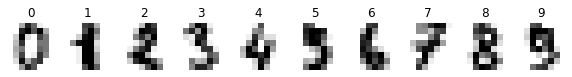

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('%i' % label)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X, y = digits.data, digits.target

In [ ]:
set(y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [ ]:
acuracias = {}
resultados = {}
for trees in [5, 10, 25, 50, 100, 150, 300, 500]:
  clf = RandomForestClassifier(n_estimators=trees, max_depth=10)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  resultados[trees] = y_pred
  accuracy = accuracy_score(y_test, y_pred)
  acuracias[trees] = accuracy * 100

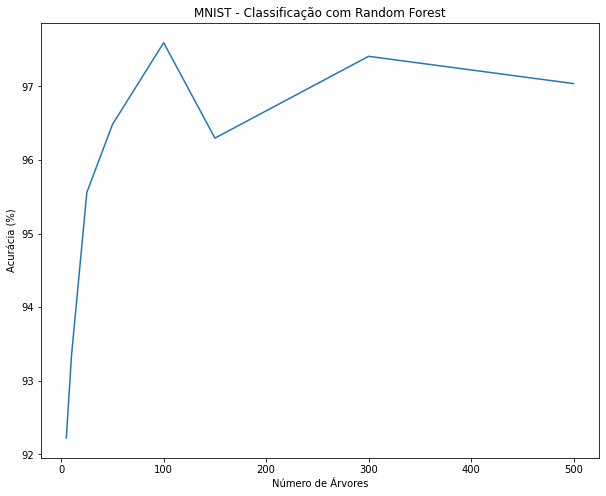

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(list(acuracias.keys()), list(acuracias.values()))
plt.title('MNIST - Classificação com Random Forest')
plt.xlabel('Número de Árvores')
plt.ylabel('Acurácia (%)')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_test, resultados[100])

array([[47,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 53,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 56,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 64,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1, 58,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 50,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 45,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  2,  1, 47]])

In [ ]:
accuracy_score(y_test, resultados[100])

0.975925925925926